# 1. One-Compartment Pharmacokinetic Model

NCA analysis completed. Success rate: 20/20 subjects
Metrics calculated using 200 valid data points

           PK Analysis Summary

FINAL PARAMETER ESTIMATES
-----------------------------------------------
Parameter    Estimate    CV%    [95% CI]
-----------------------------------------------
CL             4.583    33.1  [2.821, 8.656]
V             49.845    15.1  [39.691, 64.694]

BETWEEN-SUBJECT VARIABILITY (CV%)
-----------------------------------------------
CL            30.3%
V             15.0%

RESIDUAL VARIABILITY
-----------------------------------------------
Proportional Error (CV%): 6.0%

GOODNESS-OF-FIT STATISTICS
-----------------------------------------------
R-squared:        0.992
RMSE:             0.053
MAE:              0.034
Mean Residual:    -0.001

NCA PARAMETERS SUMMARY
-----------------------------------------------
         Cmax  Tmax     AUC     AUMC     MRT  half_life  clearance     Vss  \
count  20.000  20.0  20.000   20.000  20.000     20.000     20.00

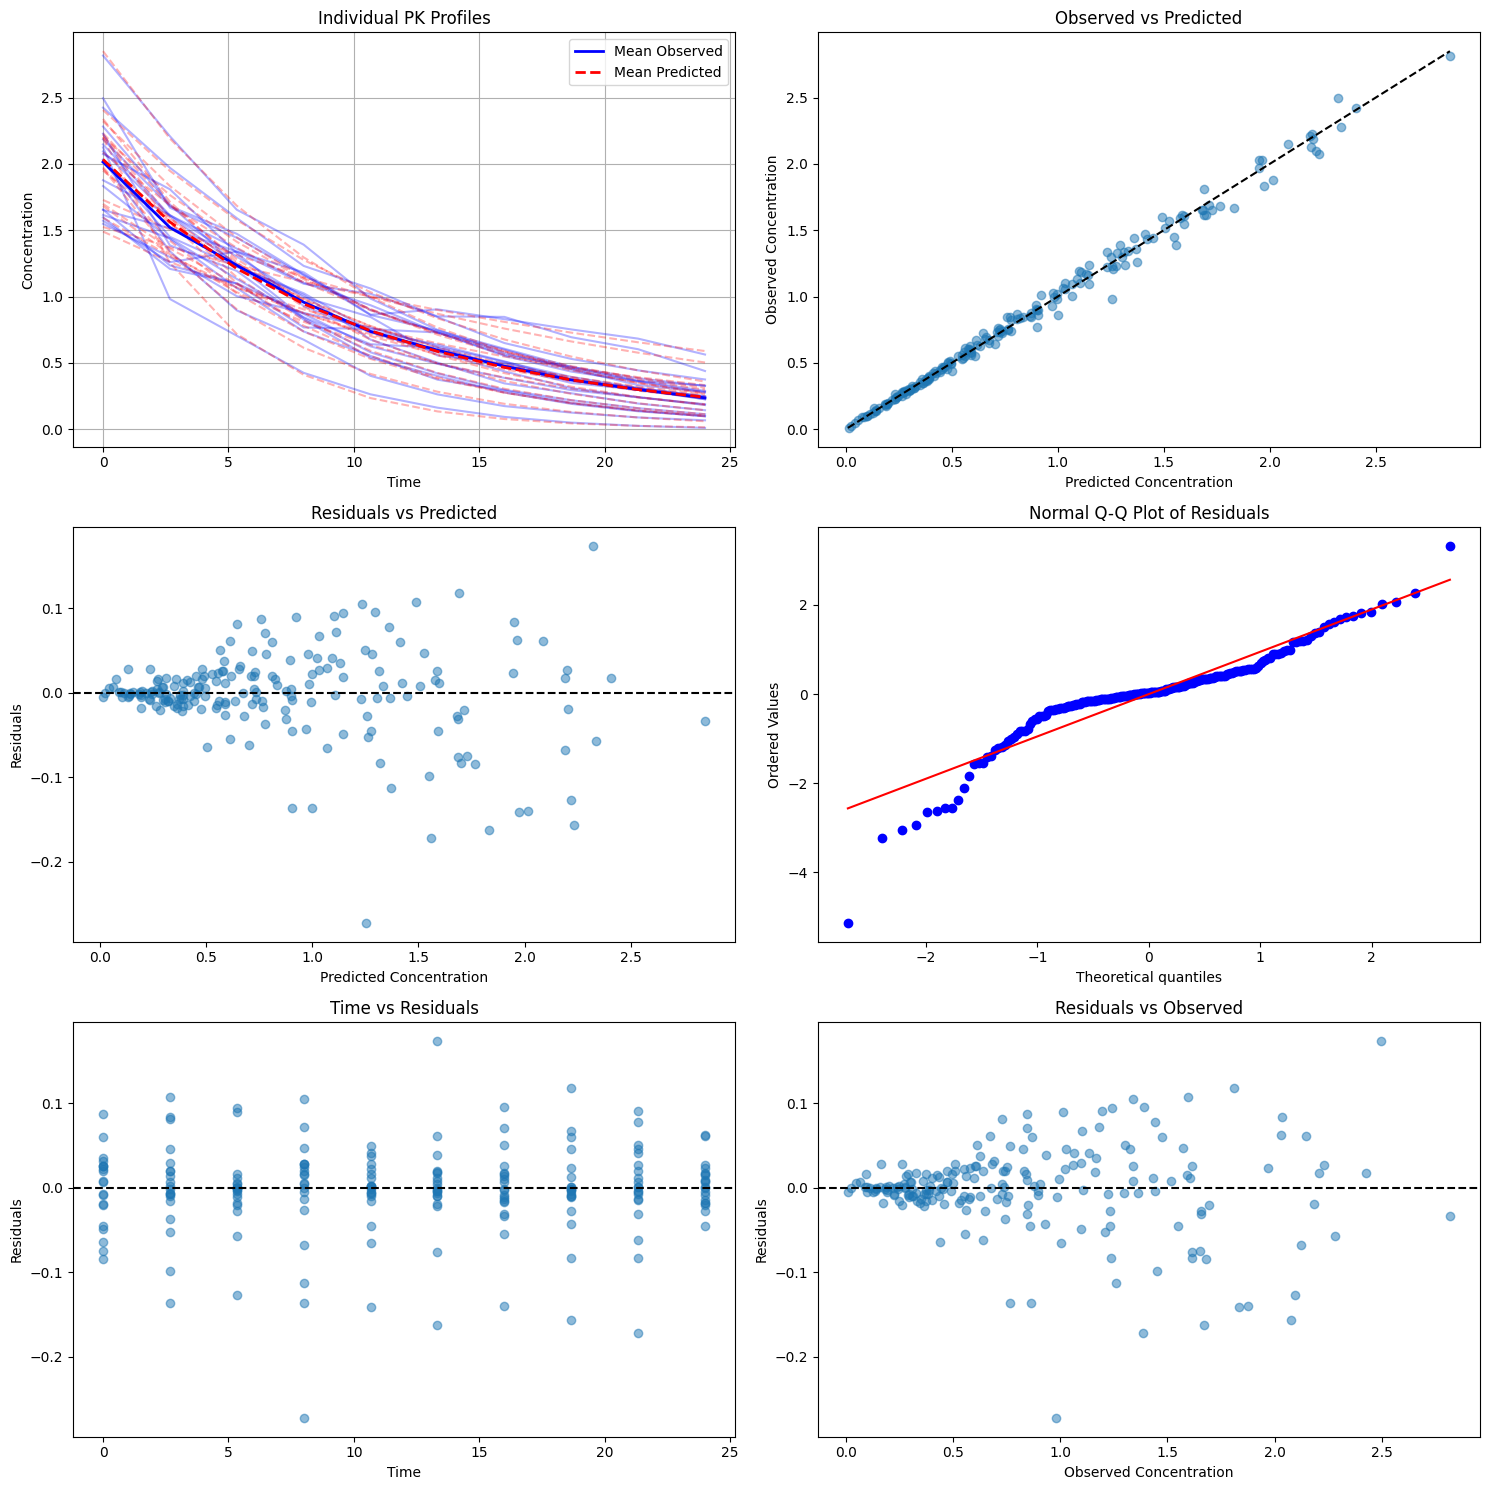

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pkpy import create_pkpy_model, BasePKWorkflow

# Define model parameters
parameters = {
    "CL": {"value": 5.0, "cv_percent": 15, "lower_bound": 0.1},
    "V": {"value": 50.0, "cv_percent": 15, "lower_bound": 1.0}
}

covariate_models = {
    'CL': {'CRCL': {'type': 'power', 'coefficient': 0.75}},
    'V': {'WT': {'type': 'power', 'coefficient': 0.75}}
}

# Create model and workflow
model = create_pkpy_model("onecomp", parameters)
workflow = BasePKWorkflow(model, n_subjects=20)

# Generate and analyze data
times = np.linspace(0, 24, 10)
workflow.generate_virtual_population(times, covariate_models=covariate_models)
results = workflow.run_analysis(create_plots=True)
workflow.print_summary()
plt.show()

# 2. Absorptive 1-Compartment Model

NCA analysis completed. Success rate: 20/20 subjects
Metrics calculated using 380 valid data points

           PK Analysis Summary

FINAL PARAMETER ESTIMATES
-----------------------------------------------
Parameter    Estimate    CV%    [95% CI]
-----------------------------------------------
Ka             0.648   124.8  [0.100, 8.506]
CL             5.513    28.0  [3.682, 9.439]
V             50.183    38.6  [19.706, 85.443]

BETWEEN-SUBJECT VARIABILITY (CV%)
-----------------------------------------------
Ka           196.7%
CL            28.3%
V             43.1%

RESIDUAL VARIABILITY
-----------------------------------------------
Proportional Error (CV%): 10.9%

GOODNESS-OF-FIT STATISTICS
-----------------------------------------------
R-squared:        0.993
RMSE:             0.071
MAE:              0.038
Mean Residual:    0.005

NCA PARAMETERS SUMMARY
-----------------------------------------------
         Cmax    Tmax     AUC     AUMC     MRT  half_life  clearance      Vss 

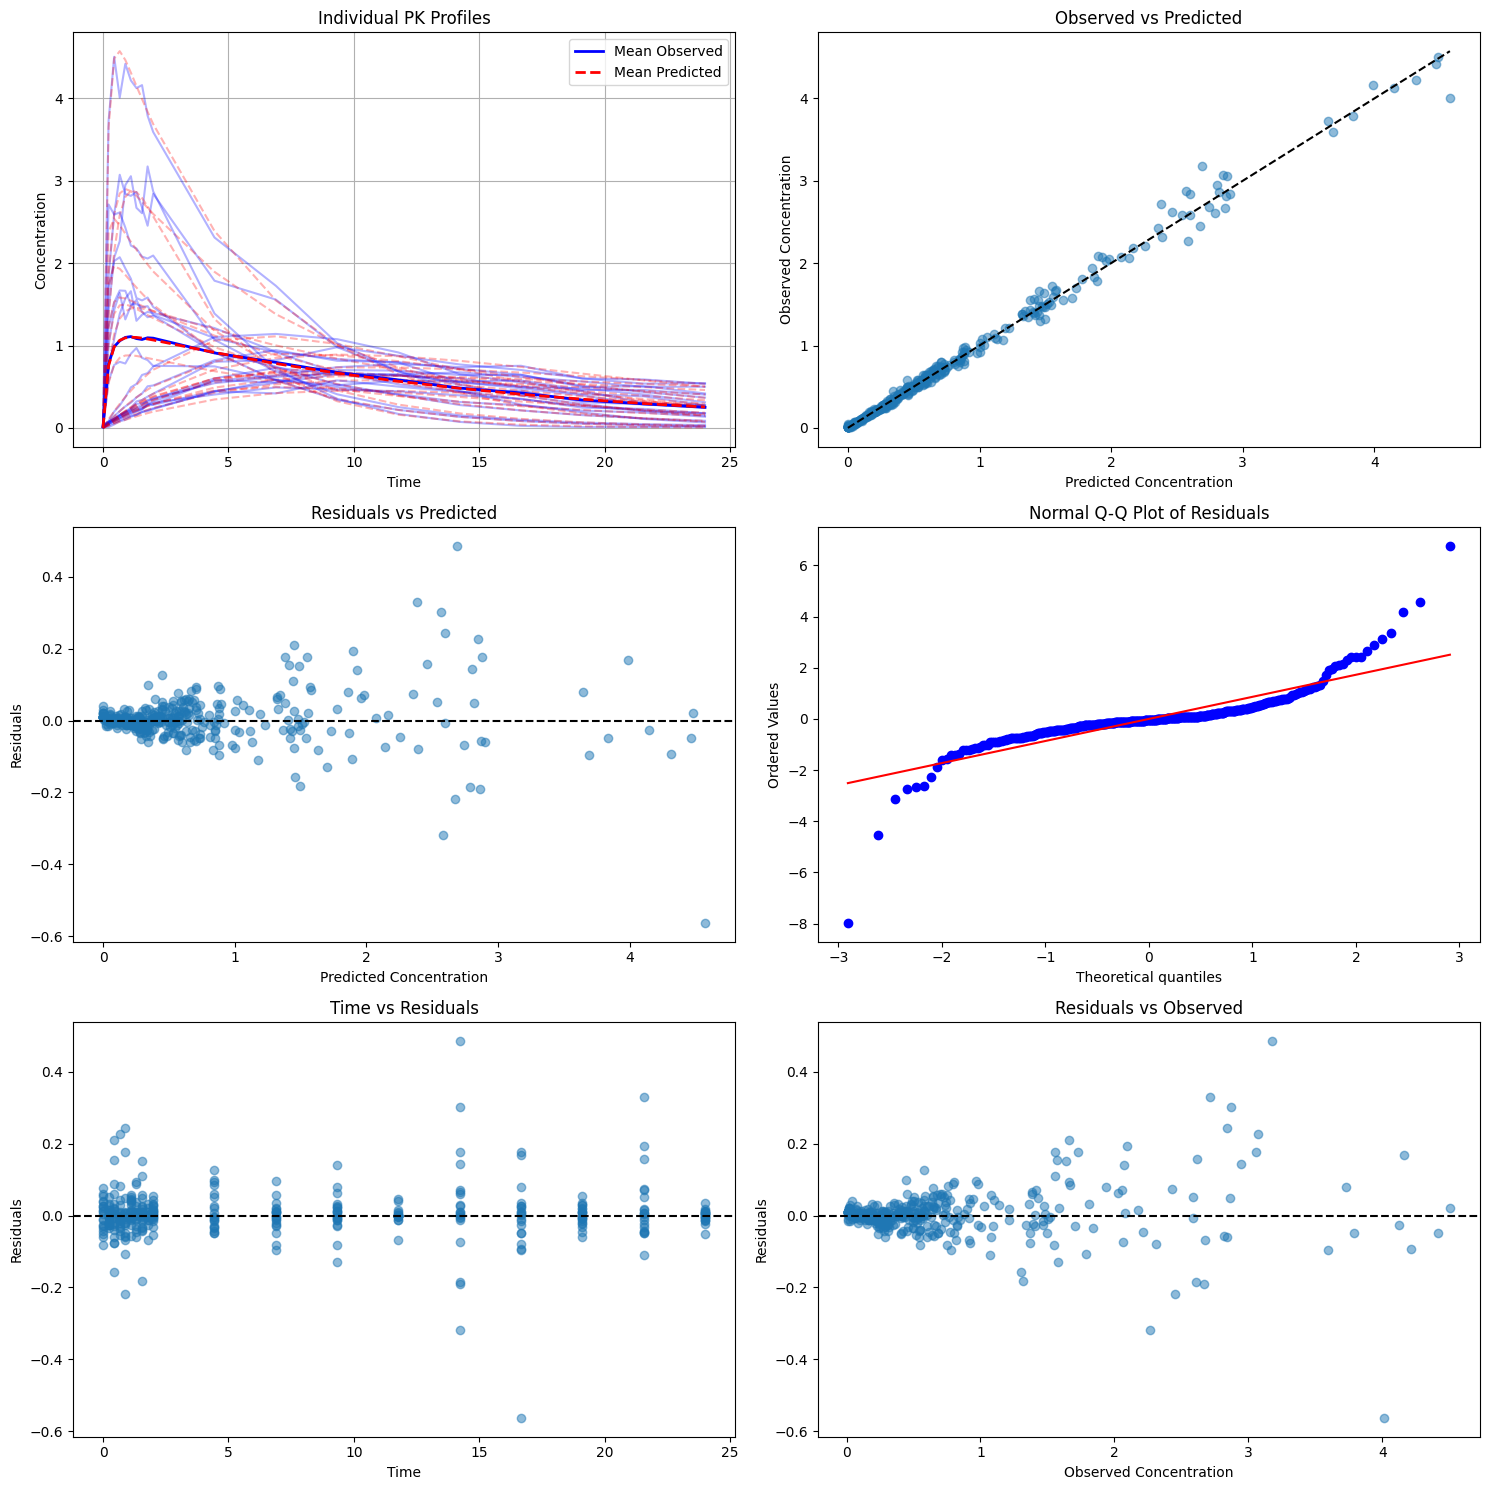

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pkpy import create_pkpy_model, BasePKWorkflow

# Define model parameters
parameters = {
    "Ka": {"value": 1.0, "cv_percent": 30, "lower_bound": 0.1},
    "CL": {"value": 5.0, "cv_percent": 30, "lower_bound": 0.1},
    "V": {"value": 50.0, "cv_percent": 30, "lower_bound": 1.0}
}

covariate_models = {
    'CL': {'CRCL': {'type': 'power', 'coefficient': 0.75}},
    'V': {'WT': {'type': 'power', 'coefficient': 0.75}},
    'Ka': {'AGE': {'type': 'linear', 'coefficient': -0.3}}
    # Ka is not related to AGE in general, but added for demonstration purposes
}

# Create model and workflow
model = create_pkpy_model("onecomp_abs", parameters)
workflow = BasePKWorkflow(model, n_subjects=20)

# Generate more frequent sampling in absorption phase
early_times = np.linspace(0, 2, 10)  # More frequent sampling in first 2 hours
late_times = np.linspace(2, 24, 10)[1:]  # Less frequent sampling afterwards
times = np.concatenate([early_times, late_times])

# Generate and analyze data
workflow.generate_virtual_population(times, covariate_models=covariate_models)
results = workflow.run_analysis(create_plots=True)
workflow.print_summary()

# 

# 3. Example with Real Data

## 3-1. No initial parameters provided


Column Classifications:
--------------------------------------------------
ID Column: Subject
Time Column: Time
Concentration Column: conc
Covariate Columns:
  - Wt
  - Dose
NCA analysis completed. Success rate: 12/12 subjects
Metrics calculated using 132 valid data points

           PK Analysis Summary

FINAL PARAMETER ESTIMATES
-----------------------------------------------
Parameter    Estimate    CV%    [95% CI]
-----------------------------------------------
Ka             1.284   121.8  [0.555, 8.179]
CL             2.794    23.3  [1.627, 3.869]
V             31.732    17.8  [23.648, 41.263]

BETWEEN-SUBJECT VARIABILITY (CV%)
-----------------------------------------------
Ka            79.8%
CL            26.3%
V             18.0%

RESIDUAL VARIABILITY
-----------------------------------------------
Proportional Error (CV%): 14.4%

GOODNESS-OF-FIT STATISTICS
-----------------------------------------------
R-squared:        0.933
RMSE:             0.740
MAE:              0.428

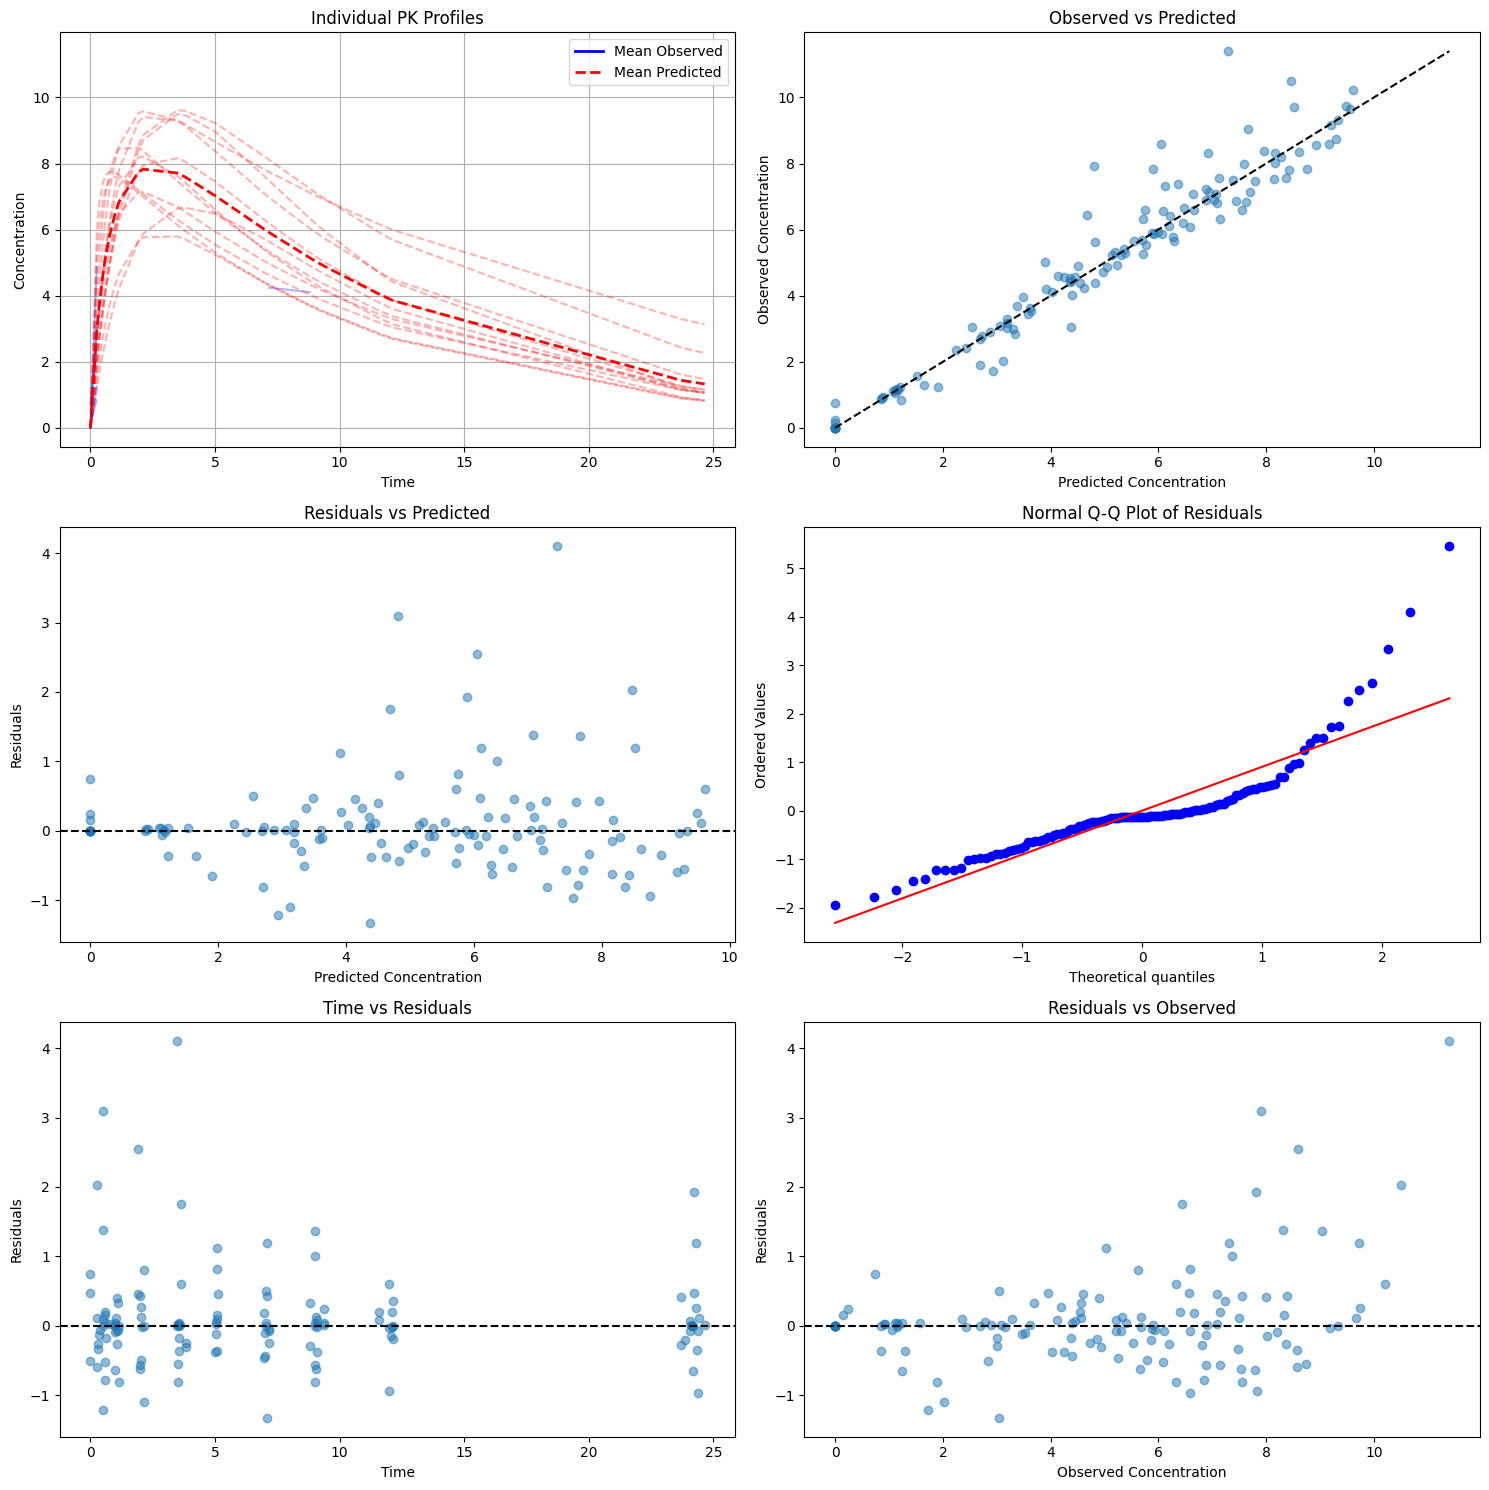

In [3]:
from pkpy import BasePKWorkflow
from pkpy.utils import convert_data

# Theoph data conversion
files = convert_data('Theoph.csv',
                     id_col='Subject',
                     time_col='Time',
                     conc_col='conc')

# analysis
workflow = BasePKWorkflow.from_files(
    model_type='onecomp_abs',
    conc_file=files['concentrations'],
    time_file=files['times'],
    demo_file=files['demographics'],
    dose=320
)

# execute analysis
workflow.run_analysis(create_plots=True)
workflow.print_summary()
workflow.save_results('theoph_results')

In [4]:
workflow.results['covariate_analysis']

{'selected_relationships': [CovariateRelationship(parameter='Ka', covariate='Dose', relationship='power', coefficient=-3.211633637510693, center=4.53),
  CovariateRelationship(parameter='V', covariate='Wt', relationship='power', coefficient=0.9032681613403996, center=70.5)],
 'final_aic': -6.527780341588697}

In [5]:
workflow.data['individual_parameters']

,Ka,CL,V
0,1.488606,1.527753,29.546462
1,1.267837,3.267609,31.160952
2,2.199156,2.980954,32.422139
3,0.825118,2.809927,29.262809
4,1.018440,2.357692,26.601259
5,0.914964,3.947552,41.772749
6,0.540829,3.225776,32.918416
7,1.441072,3.133039,37.648211
8,9.841955,3.240929,39.920827
9,0.720146,1.887688,25.692788


## 3.2 Provide initial parameters


Column Classifications:
--------------------------------------------------
ID Column: Subject
Time Column: Time
Concentration Column: conc
Covariate Columns:
  - Wt
  - Dose
NCA analysis completed. Success rate: 12/12 subjects
Metrics calculated using 132 valid data points

           PK Analysis Summary

FINAL PARAMETER ESTIMATES
-----------------------------------------------
Parameter    Estimate    CV%    [95% CI]
-----------------------------------------------
Ka             1.284    80.5  [0.555, 4.668]
CL             2.794    23.3  [1.627, 3.869]
V             31.732    17.4  [23.648, 40.865]

BETWEEN-SUBJECT VARIABILITY (CV%)
-----------------------------------------------
Ka            67.0%
CL            26.3%
V             17.7%

RESIDUAL VARIABILITY
-----------------------------------------------
Proportional Error (CV%): 14.4%

GOODNESS-OF-FIT STATISTICS
-----------------------------------------------
R-squared:        0.933
RMSE:             0.740
MAE:              0.428

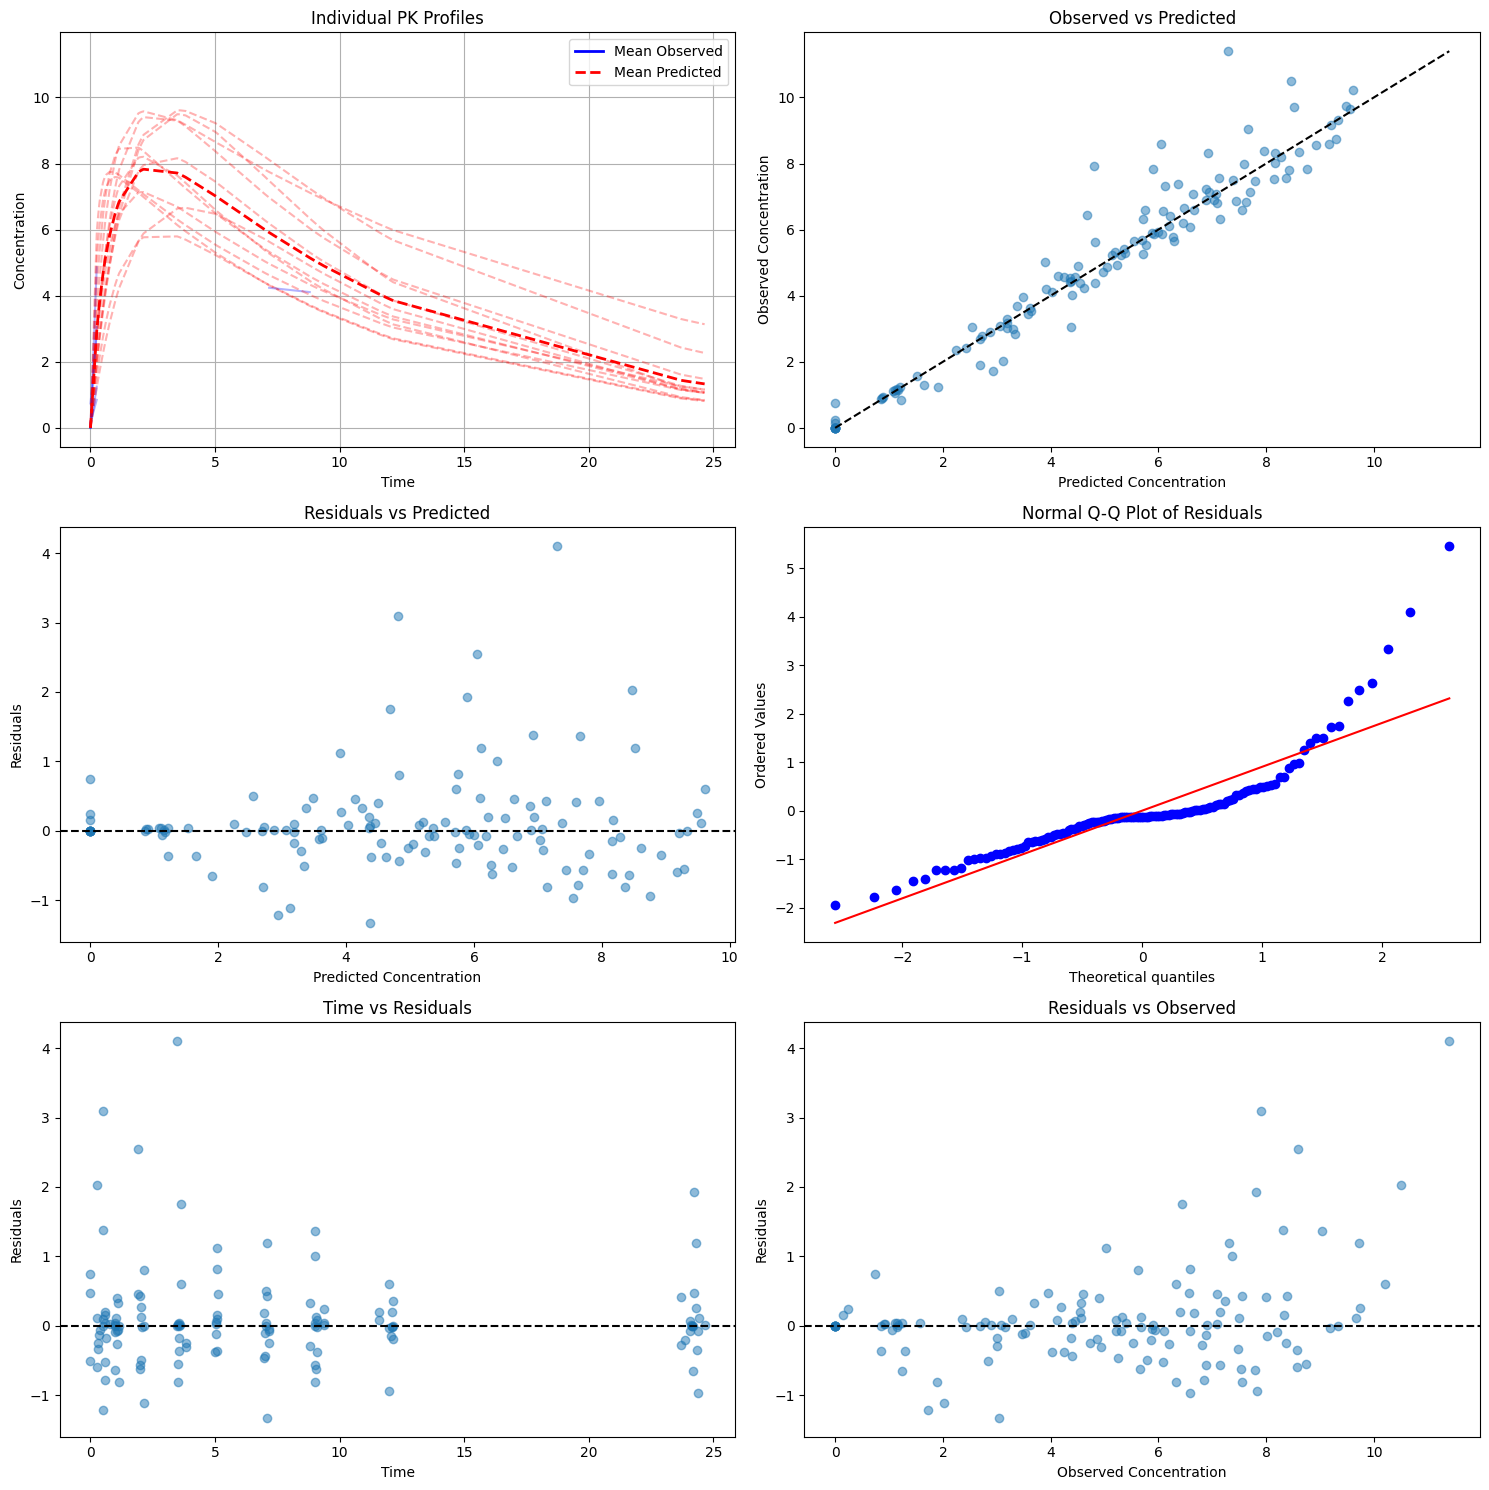

In [1]:
from pkpy import BasePKWorkflow
from pkpy.utils import convert_data

# Theoph data conversion
files = convert_data('Theoph.csv',
                    id_col='Subject',
                    time_col='Time',
                    conc_col='conc')

# set initial parameters
initial_params = {
    'Ka': {
        'value': 1.5,
        'cv_percent': 30,
        'lower_bound': 0.1,
        'upper_bound': 5.0
    },
    'CL': {
        'value': 2.5,
        'cv_percent': 25,
        'lower_bound': 0.5,
        'upper_bound': 10.0
    },
    'V': {
        'value': 30.0,
        'cv_percent': 20,
        'lower_bound': 10.0,
        'upper_bound': 100.0
    }
}

# workflow creation and analysis
workflow = BasePKWorkflow.from_files(
    model_type='onecomp_abs',
    conc_file=files['concentrations'],
    time_file=files['times'],
    demo_file=files['demographics'],
    dose=320,
    initial_params=initial_params
)

results = workflow.run_analysis(create_plots=True)
workflow.print_summary()
workflow.print_nca_summary()
workflow.save_results('theoph_results_with_initial_params')

# 4. NCA Example

In [ ]:
import numpy as np
from pkpy import create_pkpy_model, BasePKWorkflow

parameters = {
    "Ka": {"value": 1.5, "cv_percent": 30, "lower_bound": 0.1},
    "CL": {"value": 4.5, "cv_percent": 25, "lower_bound": 0.1},
    "V": {"value": 45.0, "cv_percent": 20, "lower_bound": 1.0}
}

# Create model and workflow
model = create_pkpy_model("onecomp_abs", parameters)
workflow = BasePKWorkflow(model, n_subjects=50)

# Create optimized sampling schedule
absorption_times = np.linspace(0, 2, 6)  # Dense sampling during absorption
midpoint_times = np.linspace(3, 8, 4)    # Medium density during distribution
elimination_times = np.linspace(10, 24, 4)  # Sparse sampling during elimination
times = np.concatenate([absorption_times, midpoint_times, elimination_times])

# Generate virtual population
workflow.generate_virtual_population(
    times,
    dose=500.0,
    demographic_covariates={
        'WT': ('truncnorm', 70, 15, 45, 120),
        'AGE': ('truncnorm', 40, 12, 18, 80),
        'CRCL': ('truncnorm', 100, 20, 50, 150)
    }
)

# Run analyses
workflow.run_model_fitting()
workflow.run_nca_analysis()

# Create visualizations and print summary
nca_plots = workflow.create_nca_plots()
workflow.print_nca_summary()